In [2]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)

In [5]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


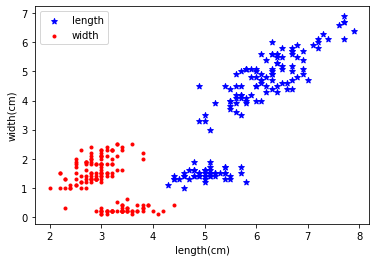

In [6]:
%matplotlib inline
plt.scatter(df['sepal length (cm)'],df['petal length (cm)'],color = 'blue',marker='*',label = 'length')
plt.scatter(df['sepal width (cm)'],df['petal width (cm)'],color = 'red',label='width',marker ='.')
plt.xlabel('length(cm)')
plt.ylabel('width(cm)')
plt.legend()

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()

In [9]:
scaler.fit(df[['sepal length (cm)']])
df['sepal length (cm)'] = scaler.transform(df[['sepal length (cm)']])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,3.5,1.4,0.2
1,0.166667,3.0,1.4,0.2
2,0.111111,3.2,1.3,0.2
3,0.083333,3.1,1.5,0.2
4,0.194444,3.6,1.4,0.2
...,...,...,...,...
145,0.666667,3.0,5.2,2.3
146,0.555556,2.5,5.0,1.9
147,0.611111,3.0,5.2,2.0
148,0.527778,3.4,5.4,2.3


In [10]:
df =df.drop(['sepal length (cm)','sepal width (cm)'],axis= 'columns')

In [11]:
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [12]:
from sklearn.cluster import KMeans

In [13]:
kf = KMeans(n_clusters=3)
kf.fit_predict(df[['petal length (cm)','petal width (cm)']])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])
scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])
df

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667
...,...,...
145,0.711864,0.916667
146,0.677966,0.750000
147,0.711864,0.791667
148,0.745763,0.916667


In [26]:
kf = KMeans(n_clusters=3)
df['cluster']= kf.fit_predict(df[['petal length (cm)','petal width (cm)']])
df

,petal length (cm),petal width (cm),target,cluster
0,0.067797,0.041667,1,0
1,0.067797,0.041667,1,0
2,0.050847,0.041667,1,0
3,0.084746,0.041667,1,0
4,0.067797,0.041667,1,0
...,...,...,...,...
145,0.711864,0.916667,2,1
146,0.677966,0.750000,2,1
147,0.711864,0.791667,2,1
148,0.745763,0.916667,2,1


In [30]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]

In [31]:
kf.cluster_centers_

array([[0.07830508, 0.06083333],
       [0.7740113 , 0.81510417],
       [0.55867014, 0.51041667]])

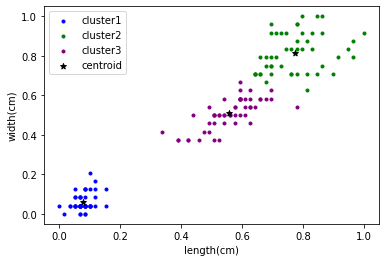

In [32]:
%matplotlib inline
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color = 'blue',marker='.',label ='cluster1')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color = 'green',marker='.',label= 'cluster2')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color = 'purple',marker='.',label = 'cluster3')
plt.scatter(kf.cluster_centers_[:,0],kf.cluster_centers_[:,1],color = 'black',marker = '*',label = 'centroid')
plt.xlabel('length(cm)')
plt.ylabel('width(cm)')
plt.legend()


In [37]:
sse=[]
k_rng = range(1,10)
for k in  k_rng:
    kf = KMeans(n_clusters= k)
    kf.fit(df)
    sse.append(kf.inertia_)

In [38]:
sse

[230.2350198863939,
 76.4675471904279,
 1.701874688192097,
 1.255538283416847,
 0.8538617353912238,
 0.6801035704886194,
 0.5651273455703979,
 0.49480346869612446,
 0.41445692788630334]

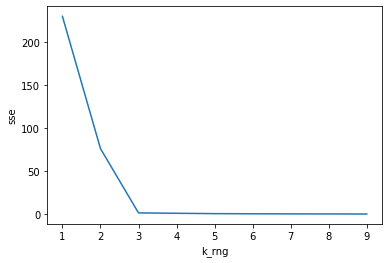

In [39]:
plt.plot(k_rng,sse)
plt.xlabel('k_rng')
plt.ylabel('sse')
plt.show()